     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 11.0 MB/s eta 0:00:00
[*********************100%***********************]  1 of 1 completed


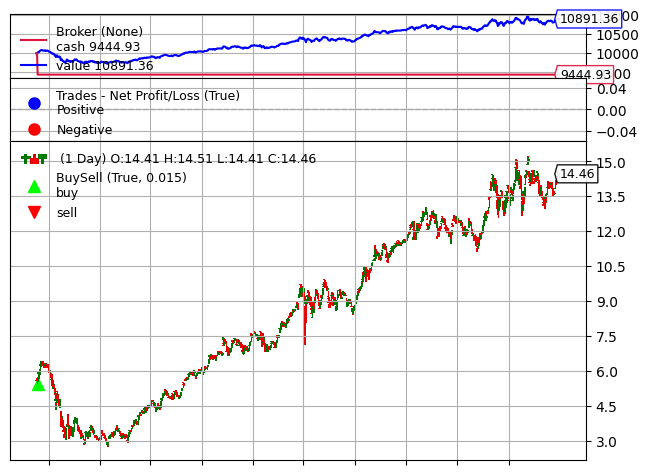

In [ ]:
!pip install backtrader
!pip install yfinance
!pip install matplotlib

import backtrader as bt
import yfinance as yf
import matplotlib.pyplot as plt

class PivotStrategy(bt.Strategy):
    params = (
        ('symbol', 'AAPL'),
        ('aapl_per_trade', 100),
    )

    def __init__(self):
        self.dataclose = self.datas[0].close
        self.datahigh = self.datas[0].high
        self.datalow = self.datas[0].low
        self.order = None

        # Calculate pivot points
        pivot_point = (self.datahigh(-1) + self.datalow(-1) + self.dataclose(-1)) / 3
        self.first_support = (2 * pivot_point) - self.datahigh(-1)
        self.first_resistance = (2 * pivot_point) - self.datalow(-1)
        self.second_support = pivot_point - (self.datahigh(-1) - self.datalow(-1))
        self.second_resistance = pivot_point + (self.datahigh(-1) - self.datalow(-1))
        self.third_support = pivot_point - 2 * (self.datahigh(-1) - self.datalow(-1))
        self.third_resistance = pivot_point + 2 * (self.datahigh(-1) - self.datalow(-1))

    def next(self):
        if self.order:
            return

        signal = self.generate_signal()

        if signal > 0:
            self.order = self.buy(size=abs(signal) * self.params.aapl_per_trade)
        elif signal < 0:
            self.order = self.sell(size=abs(signal) * self.params.aapl_per_trade)

    def generate_signal(self):
        if not self.position:
            if self.dataclose[0] < self.first_support[0]:
                return 1
            elif self.dataclose[0] < self.second_support[0]:
                return 2
            elif self.dataclose[0] < self.third_support[0]:
                return 3
        else:
            if self.dataclose[0] > self.first_resistance[0]:
                return -1
            elif self.dataclose[0] > self.second_resistance[0]:
                return -2
            elif self.dataclose[0] > self.third_resistance[0]:
                return -3
        return 0

cerebro = bt.Cerebro()

# Fetch data using yfinance and create pandas DataFrame
data_df = yf.download('AAPL', start='2008-08-01', end='2012-01-01')
data_df = data_df.loc[:, ["Open", "High", "Low", "Close", "Volume"]]
data_df.columns = ['open', 'high', 'low', 'close', 'volume']  # Rename the columns to match Backtrader's format

# Create a data feed
data = bt.feeds.PandasData(dataname=data_df)
cerebro.adddata(data)
cerebro.addstrategy(PivotStrategy)

cerebro.run()

# Plot the results
cerebro.plot(iplot=False, volume=False, style='candlestick', barup='green', bardown='red')
plt.show()


[*********************100%***********************]  1 of 1 completed


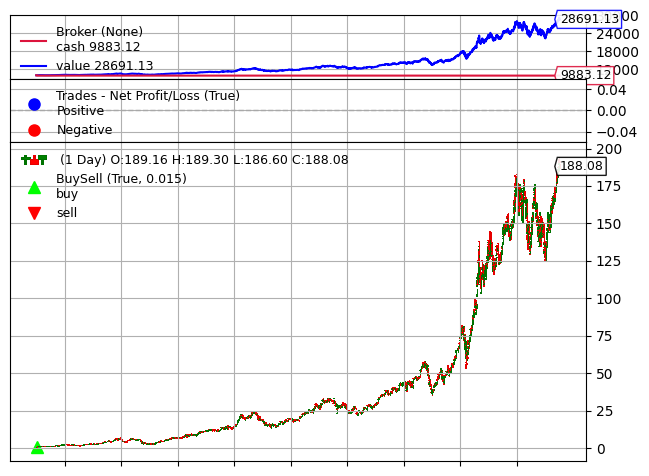

In [ ]:
import backtrader as bt
import yfinance as yf
import matplotlib.pyplot as plt

class PivotStrategy(bt.Strategy):
    params = (
        ('symbol', 'AAPL'),
        ('aapl_per_trade', 100),
    )

    def __init__(self):
        self.dataclose = self.datas[0].close
        self.datahigh = self.datas[0].high
        self.datalow = self.datas[0].low
        self.order = None

        # Calculate pivot points
        pivot_point = (self.datahigh(-1) + self.datalow(-1) + self.dataclose(-1)) / 3
        self.first_support = (2 * pivot_point) - self.datahigh(-1)
        self.first_resistance = (2 * pivot_point) - self.datalow(-1)
        self.second_support = pivot_point - (self.datahigh(-1) - self.datalow(-1))
        self.second_resistance = pivot_point + (self.datahigh(-1) - self.datalow(-1))
        self.third_support = pivot_point - 2 * (self.datahigh(-1) - self.datalow(-1))
        self.third_resistance = pivot_point + 2 * (self.datahigh(-1) - self.datalow(-1))

    def next(self):
        if self.order:
            return

        signal = self.generate_signal()

        if signal > 0:
            self.order = self.buy(size=abs(signal) * self.params.aapl_per_trade)
        elif signal < 0:
            self.order = self.sell(size=abs(signal) * self.params.aapl_per_trade)

    def generate_signal(self):
        if not self.position:
            if self.dataclose[0] < self.first_support[0]:
                return 1
            elif self.dataclose[0] < self.second_support[0]:
                return 2
            elif self.dataclose[0] < self.third_support[0]:
                return 3
        else:
            if self.dataclose[0] > self.first_resistance[0]:
                return -1
            elif self.dataclose[0] > self.second_resistance[0]:
                return -2
            elif self.dataclose[0] > self.third_resistance[0]:
                return -3
        return 0

cerebro = bt.Cerebro()

# Fetch data using yfinance and create pandas DataFrame
data_df = yf.download('AAPL', start='2005-01-01', end='2023-07-12')
data_df = data_df.loc[:, ["Open", "High", "Low", "Close", "Volume"]]
data_df.columns = ['open', 'high', 'low', 'close', 'volume']  # Rename the columns to match Backtrader's format

# Create a data feed
data = bt.feeds.PandasData(dataname=data_df)
cerebro.adddata(data)
cerebro.addstrategy(PivotStrategy)

cerebro.run()

# Plot the results
cerebro.plot(iplot=False, volume=False, style='candlestick', barup='green', bardown='red')
plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 8.1 MB/s eta 0:00:00
[*********************100%***********************]  1 of 1 completed


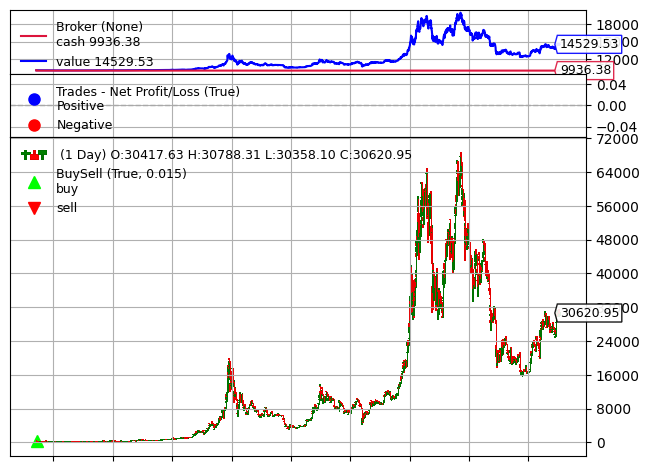

In [ ]:
!pip install backtrader
!pip install yfinance
!pip install matplotlib

import backtrader as bt
import yfinance as yf
import matplotlib.pyplot as plt

class PivotStrategy(bt.Strategy):
    params = (
        ('symbol', 'BTC-USD'),
        ('btc_per_trade', 0.15),
    )

    def __init__(self):
        self.dataclose = self.datas[0].close
        self.datahigh = self.datas[0].high
        self.datalow = self.datas[0].low
        self.order = None

        # Calculate pivot points
        pivot_point = (self.datahigh(-1) + self.datalow(-1) + self.dataclose(-1)) / 3
        self.first_support = (2 * pivot_point) - self.datahigh(-1)
        self.first_resistance = (2 * pivot_point) - self.datalow(-1)
        self.second_support = pivot_point - (self.datahigh(-1) - self.datalow(-1))
        self.second_resistance = pivot_point + (self.datahigh(-1) - self.datalow(-1))
        self.third_support = pivot_point - 2 * (self.datahigh(-1) - self.datalow(-1))
        self.third_resistance = pivot_point + 2 * (self.datahigh(-1) - self.datalow(-1))

    def next(self):
        if self.order:
            return

        signal = self.generate_signal()

        if signal > 0:
            self.order = self.buy(size=abs(signal) * self.params.btc_per_trade)
        elif signal < 0:
            self.order = self.sell(size=abs(signal) * self.params.btc_per_trade)

    def generate_signal(self):
        if not self.position:
            if self.dataclose[0] < self.first_support[0]:
                return 1
            elif self.dataclose[0] < self.second_support[0]:
                return 2
            elif self.dataclose[0] < self.third_support[0]:
                return 3
        else:
            if self.dataclose[0] > self.first_resistance[0]:
                return -1
            elif self.dataclose[0] > self.second_resistance[0]:
                return -2
            elif self.dataclose[0] > self.third_resistance[0]:
                return -3
        return 0

cerebro = bt.Cerebro()

# Fetch data using yfinance and create pandas DataFrame
data_df = yf.download('BTC-USD', start='2009-01-01', end='2023-07-12')
data_df = data_df.loc[:, ["Open", "High", "Low", "Close", "Volume"]]
data_df.columns = ['open', 'high', 'low', 'close', 'volume']  # Rename the columns to match Backtrader's format

# Create a data feed
data = bt.feeds.PandasData(dataname=data_df)
cerebro.adddata(data)
cerebro.addstrategy(PivotStrategy)

cerebro.run()

# Plot the results
fig = cerebro.plot(iplot=False, volume=False, style='candlestick', barup='green', bardown='red')[0][0]
fig.autofmt_xdate()  # Improve date formatting
plt.show()


[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 100000.00
Final Portfolio Value: 100000.00


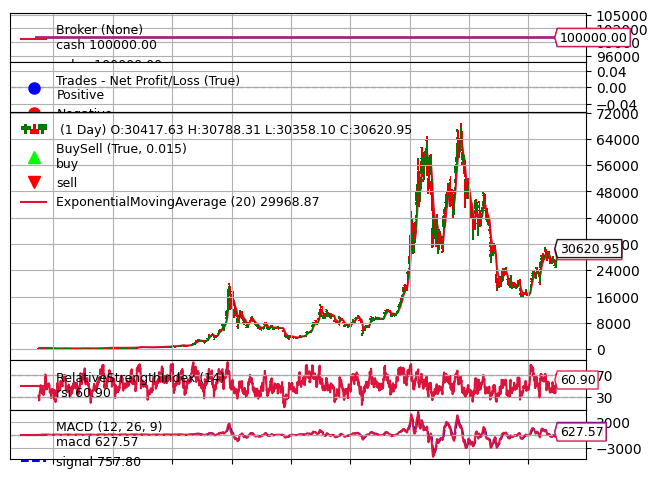

In [ ]:
!pip install backtrader
!pip install yfinance
!pip install matplotlib

import backtrader as bt
import yfinance as yf
import matplotlib.pyplot as plt

class EMAMACDRSIStrategy(bt.Strategy):
    params = (
        ('ema_period', 20),
        ('rsi_period', 14),
        ('macd_fastperiod', 12),
        ('macd_slowperiod', 26),
        ('shares_per_order', 10),
    )

    def __init__(self):
        self.dataclose = self.datas[0].close

        # Add indicators
        self.ema = bt.indicators.ExponentialMovingAverage(self.datas[0], period=self.params.ema_period)
        self.rsi = bt.indicators.RelativeStrengthIndex(self.datas[0], period=self.params.rsi_period)
        self.macd = bt.indicators.MACD(self.datas[0], period_me1=self.params.macd_fastperiod, period_me2=self.params.macd_slowperiod)

    def next(self):
        if not self.position:
            if self.rsi < 30 and self.macd.macd[0] > self.macd.signal[0] and self.dataclose[0] > self.ema[0]:
                self.buy(size=self.params.shares_per_order)

        elif self.position:
            if self.rsi > 70 and self.macd.macd[0] < self.macd.signal[0] and self.dataclose[0] < self.ema[0]:
                self.sell(size=self.params.shares_per_order)

# Fetch data using yfinance and create pandas DataFrame
data_df = yf.download('BTC-USD', start='2009-07-17', end='2023-07-12')
data_df = data_df.loc[:, ["Open", "High", "Low", "Close", "Volume"]]
data_df.columns = ['open', 'high', 'low', 'close', 'volume']  # Rename the columns to match Backtrader's format

cerebro = bt.Cerebro()

# Create a data feed
data = bt.feeds.PandasData(dataname=data_df)
cerebro.adddata(data)

# Add strategy
cerebro.addstrategy(EMAMACDRSIStrategy)

# Set initial cash
cerebro.broker.setcash(100000.0)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Plot the results
fig = cerebro.plot(iplot=False, volume=False, style='candlestick', barup='green', bardown='red')[0][0]
fig.autofmt_xdate()  # Improve date formatting
plt.show()


[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 100000.00
Final Portfolio Value: 100000.00


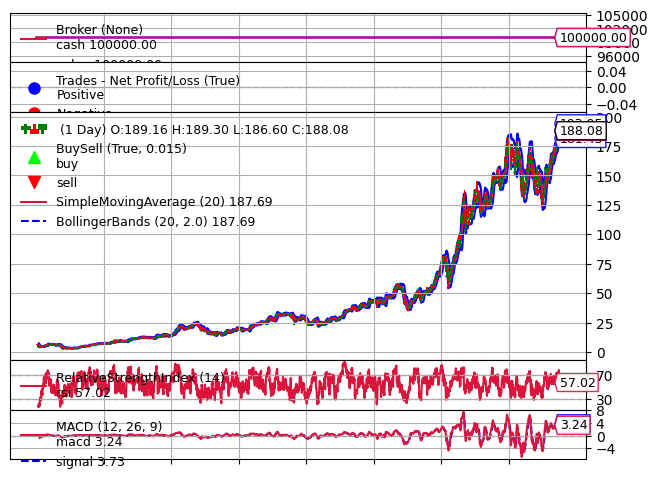

In [ ]:
import backtrader as bt
import yfinance as yf
import matplotlib.pyplot as plt

class BollingerSMA(bt.Strategy):
    params = (
        ('sma_period', 20),
        ('rsi_period', 14),
        ('macd_fastperiod', 12),
        ('macd_slowperiod', 26),
        ('shares_per_order', 10),
    )

    def __init__(self):
        self.dataclose = self.datas[0].close

        # Add indicators
        self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=self.params.sma_period)
        self.bollinger = bt.indicators.BollingerBands(self.datas[0], period=self.params.sma_period)
        self.rsi = bt.indicators.RelativeStrengthIndex(self.datas[0], period=self.params.rsi_period)
        self.macd = bt.indicators.MACD(self.datas[0], period_me1=self.params.macd_fastperiod, period_me2=self.params.macd_slowperiod)

    def next(self):
        if not self.position:
            if self.dataclose[0] > self.sma[0] and self.dataclose[0] < self.bollinger.lines.top and self.rsi[0] < 30 and self.macd.macd[0] > self.macd.signal[0]:
                self.order = self.buy(size=self.params.shares_per_order)

        elif self.position:
            if self.dataclose[0] < self.sma[0] and self.dataclose[0] > self.bollinger.lines.bot and self.rsi[0] > 70 and self.macd.macd[0] < self.macd.signal[0]:
                self.order = self.sell(size=self.params.shares_per_order)

# Fetch data using yfinance and create pandas DataFrame
data_df = yf.download('AAPL', start='2008-01-01', end='2023-07-12')
data_df = data_df.loc[:, ["Open", "High", "Low", "Close", "Volume"]]
data_df.columns = ['open', 'high', 'low', 'close', 'volume']  # Rename the columns to match Backtrader's format

cerebro = bt.Cerebro()

# Create a data feed
data = bt.feeds.PandasData(dataname=data_df)
cerebro.adddata(data)

# Add strategy
cerebro.addstrategy(BollingerSMA)

# Set initial cash
cerebro.broker.setcash(100000.0)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Plot the results
fig = cerebro.plot(iplot=False, volume=False, style='candlestick', barup='green', bardown='red')[0][0]
fig.autofmt_xdate()  # Improve date formatting
plt.show()
